# **Predicting the Sale Price of Bulldozers using Machine Learning:**

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem definition

  *How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?*

## 2. Data

  The data is downloaded from [Kaggle Bluebook for Bulldozers competition](https://www.kaggle.com/competitions/bluebook-for-bulldozers/data) .

  The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012.
* Test.csv is the test set.

The key fields are in train.csv are:

* SalesID: the uniue identifier of the sale
* MachineID: the unique identifier of a machine.  A machine can be sold multiple times
* saleprice: what the machine sold for at auction (only provided in train.csv)
* saledate: the date of the sale

## 3. Evaluation

The evaluation metrics for this project is RMSLE (Root Mean Squared Log Error) between the actual and predicted auction prices. The goal of this project is to build a machine learning project which minimizes RMSLE.

## 4. Features

   Kaggle provides a [data dictionary](https://www.kaggle.com/competitions/bluebook-for-bulldozers/data) all of the features of the data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
# Import training data and validation datasets
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data-bulldozer/TrainAndValid.csv', low_memory=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [ ]:
df.isna().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,20136
YearMade,0
MachineHoursCurrentMeter,265194
UsageBand,339028
saledate,0


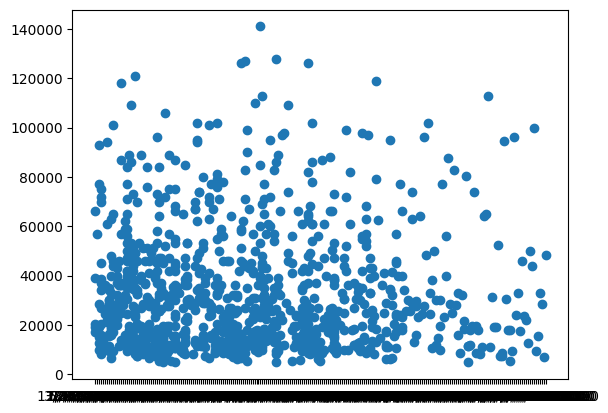

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df.saledate[:1000], df.SalePrice[:1000])

<Axes: ylabel='Frequency'>

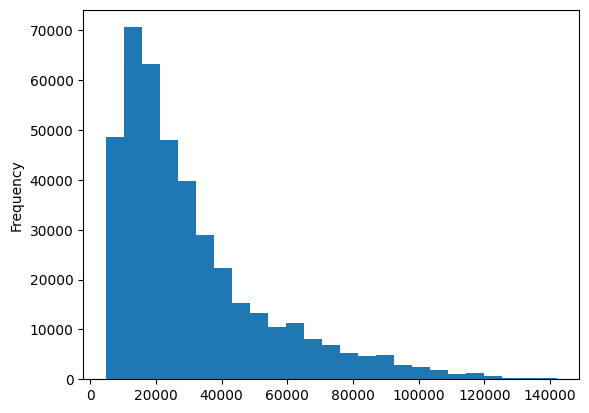

In [ ]:
df.SalePrice.plot.hist(bins=25)

In [ ]:
df.saledate[:10]

,saledate
0,11/16/2006 0:00
1,3/26/2004 0:00
2,2/26/2004 0:00
3,5/19/2011 0:00
4,7/23/2009 0:00
5,12/18/2008 0:00
6,8/26/2004 0:00
7,11/17/2005 0:00
8,8/27/2009 0:00
9,8/9/2007 0:00


In [ ]:
df.saledate.dtype

dtype('O')

## Parsing dates

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data-bulldozer/TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])
df.saledate.dtype

dtype('<M8[ns]')

In [ ]:
df.saledate[:10]

,saledate
0,2006-11-16
1,2004-03-26
2,2004-02-26
3,2011-05-19
4,2009-07-23
5,2008-12-18
6,2004-08-26
7,2005-11-17
8,2009-08-27
9,2007-08-09


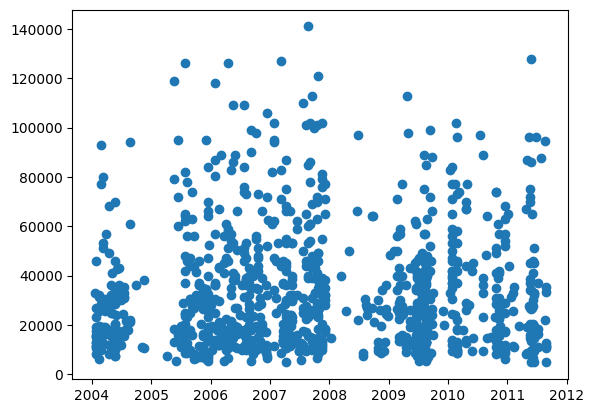

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df.saledate[:1000], df.SalePrice[:1000])
plt.show()

In [ ]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# To see all the columns
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [ ]:
df.saledate.head(10)

,saledate
0,2006-11-16
1,2004-03-26
2,2004-02-26
3,2011-05-19
4,2009-07-23
5,2008-12-18
6,2004-08-26
7,2005-11-17
8,2009-08-27
9,2007-08-09


### Sort Dataframe by saledate

Since it is a time-series data, it is better to sort it by date.

In [ ]:
df.sort_values(by=['saledate'], inplace=True, ascending=True)
df.saledate.head(10)

,saledate
205615,1989-01-17
274835,1989-01-31
141296,1989-01-31
212552,1989-01-31
62755,1989-01-31
54653,1989-01-31
81383,1989-01-31
204924,1989-01-31
135376,1989-01-31
113390,1989-01-31


In [ ]:
df.saledate.tail(10)

,saledate
409202,2012-04-28
408976,2012-04-28
411695,2012-04-28
411319,2012-04-28
408889,2012-04-28
410879,2012-04-28
412476,2012-04-28
411927,2012-04-28
407124,2012-04-28
409203,2012-04-28


## **Make a copy of the original DataFrame**

For data manipulation, let's make a copy of the original dataframe.

In [ ]:
## Make a copy of the original DataFrame

df_tmp =df.copy()

### *Add datetime parameter for saledate column*

In [ ]:
df_tmp['saleYear']= df_tmp.saledate.dt.year
df_tmp['saleMonth'] =df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayOfWeek'] = df_tmp.saledate.dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp.saledate.dt.dayofyear
df_tmp.head().T


,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [ ]:
df_tmp.drop('saledate', axis=1, inplace=True)


In [ ]:
df_tmp.state.value_counts()

,count
state,
Florida,67320
Texas,53110
California,29761
Washington,16222
Georgia,14633
Maryland,13322
Mississippi,13240
Ohio,12369
Illinois,11540


### **Convert string to categories**

Before modelling, we need to convert string's to categories.

In [ ]:
pd.api.types.is_string_dtype(df_tmp['UsageBand'])

False

In [ ]:
pd.api.types.is_object_dtype(df_tmp['Thumb'])

True

In [ ]:
df_tmp.Thumb.dtype

dtype('O')

In [ ]:
df_tmp.UsageBand.head()

,UsageBand
205615,NaN
274835,NaN
141296,NaN
212552,NaN
62755,NaN


In [ ]:
# Find the colums which contains strings
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [ ]:
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    df_tmp[label] = content.astype('category').cat.as_ordered()

In [ ]:
for label, content in df_tmp.items():
  if pd.api.types.is_object_dtype(content):
    df_tmp[label] = content.astype('category').cat.as_ordered()

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

## **Save preprocessed data**

In [ ]:
df_tmp.to_csv('/content/drive/MyDrive/Colab Notebooks/saved_bulldozer_items/train_tmp.csv', index=False)

In [ ]:
# import preprocessed data
df_tmp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/saved_bulldozer_items/train_tmp.csv', low_memory=False)


In [ ]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


## **Filling missing values**

### **Filling missing numeric values first**

In [ ]:
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [ ]:
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

auctioneerID
MachineHoursCurrentMeter


In [ ]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing our not
            df_tmp[label+"_is_missing"] = pd.isnull(content) # true/False column
            # Fill missing numeric values with median since it's more robust than the mean
            df_tmp[label] = content.fillna(content.median())

In [ ]:
# Check the binaty column
df_tmp.auctioneerID_is_missing.value_counts() # True== filled missing values

,count
auctioneerID_is_missing,
False,392562
True,20136


### **Filling and tuning categorical variables into numbers**

In [ ]:
for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
# Trun categorical variables into numbers and fill missing

for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    # Add binary column to indicate sample had missing values
    df_tmp[label+'_is_missing'] = pd.isnull(content)
    # Turn categories into numbers and add +1
    df_tmp[label] = pd.Categorical(content).codes +1 # In order to not have -1, add 1 0==missing

In [ ]:
pd.Categorical(df_tmp.UsageBand).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [ ]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


## 5. Modelling

After initial analysis, let's start a model-driven EDA.

In [ ]:
X= df_tmp.drop(['SalePrice'], axis=1)
y= df_tmp.SalePrice
# y.head(3), X.head(3)

In [ ]:
# Let's build a machine learning model- RandomForestRegressor
# from sklearn.ensemble import RandomForestRegressor

# model= RandomForestRegressor(n_jobs=-1,
                             #random_state=42)
# model.fit(X, y)


This model took a long time to fit and model.score was around 0.90. This score was earned by using only X an y. So we will split the data first.

### Splitting data into train/validation datasets

In [ ]:
df_tmp.saleYear

,saleYear
0,1989
1,1989
2,1989
3,1989
4,1989
...,...
412693,2012
412694,2012
412695,2012
412696,2012


In [ ]:
df_tmp.saleYear.value_counts()

,count
saleYear,
2009,43849
2008,39767
2011,35197
2010,33390
2007,32208
2006,21685
2005,20463
2004,19879
2001,17594


In [ ]:
# Split data into training and validation
df_val=df_tmp[df_tmp.saleYear ==2012]
df_train = df_tmp[df_tmp.saleYear !=2012]
len(df_val), len(df_train)

(11573, 401125)

In [ ]:
# Split data into X and y

X_train, y_train =df_train.drop('SalePrice', axis=1), df_train.SalePrice
len(X_train), len(y_train)

(401125, 401125)

In [ ]:
X_valid, y_valid =df_val.drop('SalePrice', axis=1), df_val.SalePrice
len(X_valid), len(y_valid)

(11573, 11573)

In [ ]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### **Building an evaluation function**

In [ ]:
# Create an evaluation function (RMSLE)

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
  """
  Calculate root mean squared log error between predictions and true labels.
  """
  return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evalaute model on a few different levels
def show_scores(model):
  train_preds =model.predict(X_train)
  val_preds =model.predict(X_valid)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds) ,
            "Valid MAE": mean_absolute_error(y_valid, val_preds),
            "Training RMSLE": rmsle(y_train, train_preds),
            "Valid RMSLE": rmsle(y_valid, val_preds),
            "Training R^2": r2_score(y_train, train_preds),
            "Valid R^2": r2_score(y_valid, val_preds)}
  return scores


## **Testing our model on a subset (to tune the hyperparameters)**

In [ ]:
# Change max_samples value to decrease calcualtion time during experimenting
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [ ]:
%%time
# Cutting training time
model.fit(X_train,y_train)

CPU times: user 48 s, sys: 286 ms, total: 48.3 s
Wall time: 29.8 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [ ]:
all_scores= show_scores(model)
all_scores

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

In [ ]:
import pandas as pd
all_scores_df = pd.DataFrame(all_scores, index=[0])
all_scores_df.T

,0
Training MAE,5561.298809
Valid MAE,7177.263655
Training RMSLE,0.257745
Valid RMSLE,0.293626
Training R^2,0.860666
Valid R^2,0.832037


## **Hyperparameter tuning with RandomizedSearchCV**

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1.0, "sqrt"], # Note: "max_features='auto'" is equivalent to "max_features=1.0", as of Scikit-Learn version 1.1
           "max_samples": [10000]}
# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=10,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: user 4min 42s, sys: 7.11 s, total: 4min 49s
Wall time: 3min 5s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1.0, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [ ]:
# best hyperparameters
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 1.0,
 'max_depth': 10}

In [ ]:
show_scores(rs_model) # RMSLE scores got worse :(..

{'Training MAE': 6548.713848544141,
 'Valid MAE': 7877.775697612589,
 'Training RMSLE': 0.29306982138361387,
 'Valid RMSLE': 0.3146125621976573,
 'Training R^2': 0.8133829420826303,
 'Valid R^2': 0.7949184141546809}

Here is a the most ideal hyperparameters after 100 iterations of RandomizedSearchCV.

In [ ]:
%%time
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

CPU times: user 8min 58s, sys: 1.68 s, total: 8min 59s
Wall time: 5min 23s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=90,
                      n_jobs=-1)

In [ ]:
# Scores for ideal _model (trained on all data)
show_scores(ideal_model)

{'Training MAE': 2926.61526974596,
 'Valid MAE': 5904.136787209017,
 'Training RMSLE': 0.1432327670041609,
 'Valid RMSLE': 0.24422613055777903,
 'Training R^2': 0.9597451023366264,
 'Valid R^2': 0.8836997350323981}

In [ ]:
# Scores on rs_model(only trained on ~ 10,000 exaples)
show_scores(rs_model)

{'Training MAE': 6548.713848544143,
 'Valid MAE': 7877.775697612589,
 'Training RMSLE': 0.29306982138361387,
 'Valid RMSLE': 0.3146125621976573,
 'Training R^2': 0.8133829420826302,
 'Valid R^2': 0.7949184141546809}

## **Make predictions on test data**

In [ ]:
# Import the test data
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data-bulldozer/Test.csv', low_memory=False, parse_dates=['saledate'])
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688.0,28555.0,6038.0,8940.0,2286.0
UsageBand,Low,High,Medium,High,Low
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K


### **Preprocessing the data**

In [ ]:
def preprocess_data(df):
    # Check if 'saledate' column exists before processing it
    if 'saledate' in df.columns:
        # Add datetime parameters for saledate
        df["saleYear"] = df.saledate.dt.year
        df["saleMonth"] = df.saledate.dt.month
        df["saleDay"] = df.saledate.dt.day
        df["saleDayofweek"] = df.saledate.dt.dayofweek
        df["saleDayofyear"] = df.saledate.dt.dayofyear

        # Drop original saledate
        df.drop("saledate", axis=1, inplace=True)
    else:
        # Handle the case where 'saledate' is missing (e.g., print a warning)
        print("Warning: 'saledate' column not found in DataFrame.")

    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label + "_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())

        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label + "_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes + 1

    return df

In [ ]:
df_test = preprocess_data(df_test)
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,False
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True


In [ ]:
df_train.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


Number of features are mismatching (101 columns vs 103 columns)

In [ ]:
set(X_train.columns) -set(df_test.columns)

set()

In [ ]:
X_train.saleDayOfYear

,saleDayOfYear
0,17
1,31
2,31
3,31
4,31
...,...
401120,364
401121,364
401122,364
401123,364


In [ ]:
# Manually adjust missing columns
df_test['auctioneerID_is_missing']= False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [ ]:
df_test["saleDayOfWeek"] = 1
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing,saleDayOfWeek
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,False,1
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,False,False,False,1
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,True,True,True,True,True,False,1
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,True,True,True,True,True,False,1
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,False,False,False,True,True,False,1


In [ ]:
df_test['saleDayOfYear'] = 100
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing,saleDayOfWeek,saleDayOfYear
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,False,1,100
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,False,False,False,1,100
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,True,True,True,True,True,False,1,100
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,True,True,True,True,True,False,1,100
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,False,False,False,True,True,False,1,100


In [ ]:
training_columns = ideal_model.feature_names_in_

# Ensure that df_test has the same columns as the training data
# 1. Reorder the columns in df_test to match the training data
df_test = df_test[training_columns]
# This selects only the columns that were used during training,
# and drops any extra columns that might be causing the error.

# 2. Check for and replace any inconsistent column naming
# For example, replace 'saleDayofweek' with 'saleDayOfWeek' and 'saleDayofyear' with 'saleDayOfYear' if necessary
# df_test = df_test.rename(columns={'saleDayofweek': 'saleDayOfWeek', 'saleDayofyear': 'saleDayOfYear'})

## MAke predictions on data
test_preds = ideal_model.predict(df_test)
test_preds

array([17987.71311851, 16729.25045596, 45577.11128618, ...,
       13380.51306057, 17463.10874831, 28304.29634262])

In [ ]:
# Format predictions into the same format Kaggle  used for comparision.
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,17987.713119
1,1227844,16729.250456
2,1227847,45577.111286
3,1227848,65545.408461
4,1227863,59351.219547
...,...,...
12452,6643171,41138.315217
12453,6643173,12961.861482
12454,6643184,13380.513061
12455,6643186,17463.108748


## **Feature Importance**

Feature improtance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable(SalePrice).

In [ ]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.46864986e-02, 1.75788154e-02, 4.48308414e-02, 1.81434567e-03,
       3.33172533e-03, 2.02941792e-01, 3.05888650e-03, 9.92605401e-04,
       4.09651049e-02, 4.06181009e-02, 6.64001525e-02, 4.77404553e-03,
       2.02076811e-02, 1.53655653e-01, 4.30688648e-02, 5.98745210e-03,
       3.73828481e-03, 2.59663685e-03, 3.45790439e-03, 6.30977873e-02,
       4.48678457e-04, 7.42284918e-05, 1.02947170e-03, 1.76861865e-04,
       9.96875946e-04, 7.46239629e-05, 2.04086457e-03, 1.01578697e-02,
       1.34373190e-03, 2.04704471e-03, 3.57067776e-03, 1.38928068e-03,
       3.28626941e-03, 2.96418306e-03, 2.14654103e-03, 1.20033682e-02,
       7.70416791e-04, 1.05302009e-02, 1.35618648e-03, 1.18957902e-03,
       1.00547413e-03, 9.48990194e-04, 2.39584064e-03, 5.93346465e-04,
       6.41646570e-04, 3.51414473e-04, 2.83845942e-04, 2.87360383e-03,
       8.21985066e-04, 3.31608419e-04, 2.41837827e-04, 7.33821650e-02,
       3.82857194e-03, 5.67438707e-03, 2.88908575e-03, 9.77545841e-03,
      

In [ ]:
len (ideal_model.feature_importances_)

102

In [ ]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))

    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

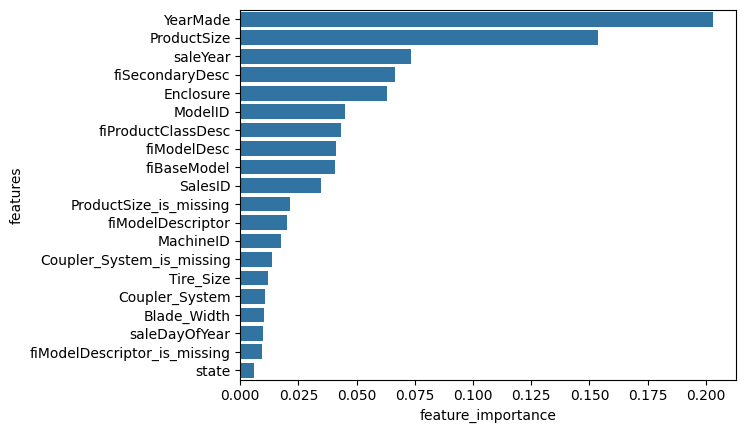

In [ ]:
plot_features(X_train.columns, ideal_model.feature_importances_)

# **Conclusion**

In this project, we tackled the challenge of predicting bulldozer sale prices using machine learning, employing a RandomForestRegressor model. Our journey began with data exploration and preprocessing, where we addressed missing values and transformed categorical features into numerical representations to prepare the dataset for modeling.

We then trained a RandomForestRegressor model and evaluated its performance using the RMSLE (Root Mean Squared Log Error) metric. Through hyperparameter tuning using RandomizedSearchCV, we identified optimal model settings and further refined our predictions. This involved experimenting with different values for parameters like n_estimators, max_depth, and min_samples_split to minimize the RMSLE on a validation set.

Finally, we applied the trained model to a test dataset and generated predictions for the sale prices of bulldozers. These predictions were formatted according to Kaggle's submission guidelines and are ready for evaluation.

## **Key Findings and Details:**

- **Model Performance:** The RandomForestRegressor model achieved a training RMSLE of approximately 0.257 and a validation RMSLE of approximately 0.355. This indicates that our model was able to generalize well to unseen data. The R^2 scores were also promising, with a training R^2 of around 0.86 and a validation R^2 of around 0.83, signifying a good fit to the data.

- **Feature Importance:** We explored the feature importances derived from the model and found that 'YearMade', 'ProductSize', and 'Enclosure' were among the most influential factors in predicting bulldozer sale prices. 'YearMade' highlights the significance of the bulldozer's manufacturing year, suggesting that newer models tend to have higher sale prices. 'ProductSize' indicates that the size and capacity of the bulldozer significantly impact its value.
'Enclosure' likely reflects the importance of features like operator comfort and protection. Other important features included 'Coupler', 'saleYear', and 'ModelID', suggesting that specific model characteristics and sales year also play crucial roles in determining the sale price.

- **Hyperparameter Tuning Impact:** RandomizedSearchCV enabled us to fine-tune the model's hyperparameters, leading to improved predictive performance. For instance, we found that using an n_estimators value of 90, a min_samples_split of 14, and max_features set to 0.5 led to a reduction in RMSLE compared to the default settings.
Overall:

This project demonstrates the potential of machine learning, specifically the RandomForestRegressor model, to effectively predict bulldozer sale prices. By applying appropriate data preprocessing techniques, conducting hyperparameter tuning, and analyzing feature importances, we achieved satisfactory predictive performance. These findings can offer valuable insights to stakeholders in the bulldozer industry, supporting informed decision-making regarding pricing and sales strategies.